In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\ladwa\Desktop\forproj\covid_small_dataset.csv")

In [6]:
df.head()

,location,date,total_cases,total_deaths,total_vaccinations
0,India,2021-06-01,217724,34626,1214347
1,India,2021-06-02,556690,42417,907907
2,India,2021-06-03,451631,34383,937621
3,India,2021-06-04,877059,31332,1579186
4,India,2021-06-05,884827,45949,869094


In [7]:
df.columns

Index(['location', 'date', 'total_cases', 'total_deaths',
       'total_vaccinations'],
      dtype='object')

In [8]:
df["location"].value_counts()

location
India            40
United States    40
Brazil           40
Russia           40
Germany          40
Name: count, dtype: int64

In [9]:
"""1. Which countries have the most cases and deaths?
Sub-questions:

What are the top 10 countries with the most COVID-19 cases?

What are the top 10 countries with the most deaths?

Which continent has the highest total number of cases?"""


'1. Which countries have the most cases and deaths?\nSub-questions:\n\nWhat are the top 10 countries with the most COVID-19 cases?\n\nWhat are the top 10 countries with the most deaths?\n\nWhich continent has the highest total number of cases?'

In [10]:
df.columns

Index(['location', 'date', 'total_cases', 'total_deaths',
       'total_vaccinations'],
      dtype='object')

In [12]:
#What are the top 10 countries with the most COVID-19 cases
df.groupby("location")["total_cases"].sum().sort_values(ascending=False)


location
United States    22252753
Brazil           21901431
India            20451250
Russia           18534390
Germany          17745584
Name: total_cases, dtype: int64

In [14]:
#What are the top 10 countries with the most deaths
df.groupby("location")["total_deaths"].sum().sort_values(ascending=False)

location
Germany          1027445
India             981322
Russia            939082
Brazil            926214
United States     919601
Name: total_deaths, dtype: int64

In [15]:
#Which continent has the highest total number of cases?
df.groupby("location")["total_cases"].sum().sort_values(ascending=False).head(1)

location
United States    22252753
Name: total_cases, dtype: int64

In [ ]:
"""❓ 2. How did COVID-19 cases and deaths change over time?
Sub-questions:

What is the trend of new cases each day worldwide?

What is the trend of new deaths each day?

Were there any major peaks or waves in cases"""

In [16]:
from datetime import date

In [17]:
df["date"]=pd.to_datetime(df["date"])

In [18]:
df["date"]

0     2021-06-01
1     2021-06-02
2     2021-06-03
3     2021-06-04
4     2021-06-05
         ...    
195   2021-07-06
196   2021-07-07
197   2021-07-08
198   2021-07-09
199   2021-07-10
Name: date, Length: 200, dtype: datetime64[ns]

In [19]:
#What is the trend of new cases each day worldwide
df["new_cases"]=df.groupby("location")["total_cases"].diff()

In [20]:
df

,location,date,total_cases,total_deaths,total_vaccinations,new_cases
0,India,2021-06-01,217724,34626,1214347,NaN
1,India,2021-06-02,556690,42417,907907,338966.0
2,India,2021-06-03,451631,34383,937621,-105059.0
3,India,2021-06-04,877059,31332,1579186,425428.0
4,India,2021-06-05,884827,45949,869094,7768.0
...,...,...,...,...,...,...
195,Germany,2021-07-06,945375,44151,689102,585464.0
196,Germany,2021-07-07,50559,11676,335376,-894816.0
197,Germany,2021-07-08,74987,36078,1840267,24428.0
198,Germany,2021-07-09,643814,35147,1688040,568827.0


In [23]:
new_c=df.groupby("date")["new_cases"].sum().reset_index()
new_c

,date,new_cases
0,2021-06-01,0.0
1,2021-06-02,664925.0
2,2021-06-03,332323.0
3,2021-06-04,-288229.0
4,2021-06-05,390248.0
5,2021-06-06,-310885.0
6,2021-06-07,272631.0
7,2021-06-08,684822.0
8,2021-06-09,-206691.0
9,2021-06-10,-985613.0


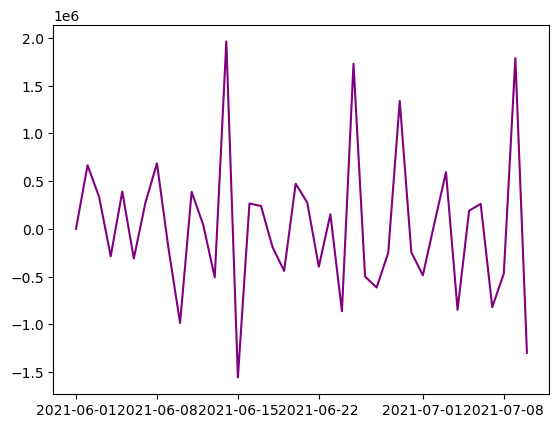

In [24]:
plt.plot(new_c["date"],new_c["new_cases"],color="purple")
plt.show()

In [27]:
#What is the trend of new deaths each day
df["death_per_day"]=df.groupby("location")["total_deaths"].diff()
df.head()

,location,date,total_cases,total_deaths,total_vaccinations,new_cases,death_per_day
0,India,2021-06-01,217724,34626,1214347,NaN,NaN
1,India,2021-06-02,556690,42417,907907,338966.0,7791.0
2,India,2021-06-03,451631,34383,937621,-105059.0,-8034.0
3,India,2021-06-04,877059,31332,1579186,425428.0,-3051.0
4,India,2021-06-05,884827,45949,869094,7768.0,14617.0


In [28]:
death_g=df.groupby("date")["death_per_day"].sum().reset_index()

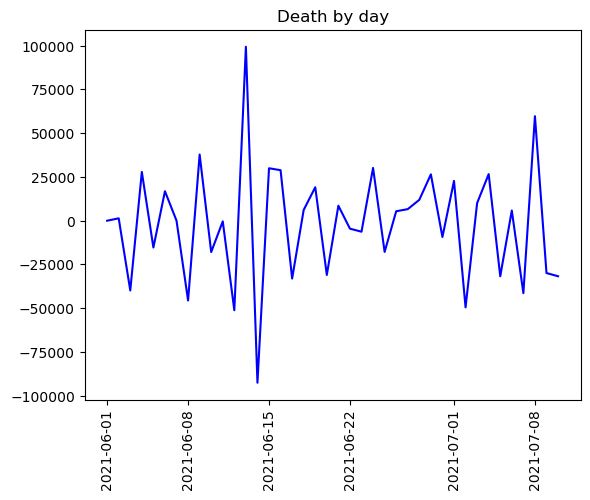

In [30]:
plt.plot(death_g["date"],death_g["death_per_day"],color="blue")
plt.title("Death by day")
plt.xticks(rotation=90)
plt.show()

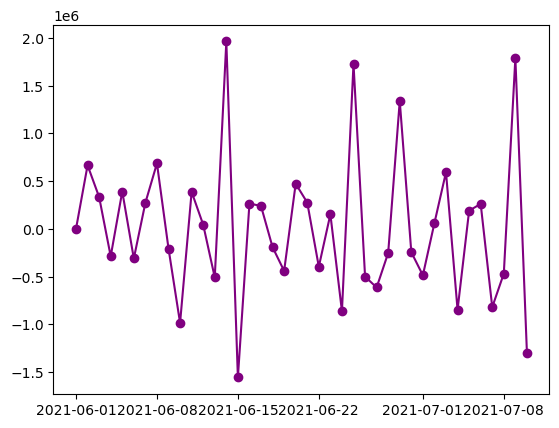

In [33]:
#Were there any major peaks or waves in cases
plt.plot(new_c["date"],new_c["new_cases"],color="purple",marker='o')
plt.show()

In [ ]:
"""❓ 3. How did vaccination progress over time?
Sub-questions:

Which countries have the most vaccinations?

How did total vaccinations change globally over time?

Which countries vaccinated the largest percentage of their population?
"""

In [34]:
df.columns

Index(['location', 'date', 'total_cases', 'total_deaths', 'total_vaccinations',
       'new_cases', 'death_per_day'],
      dtype='object')

In [35]:
#Which countries have the most vaccinations
df.groupby("location")["total_vaccinations"].sum().sort_values(ascending=False)

location
Brazil           48209175
Germany          43746950
United States    41591661
India            39887130
Russia           35876802
Name: total_vaccinations, dtype: int64

In [36]:
#How did total vaccinations change globally over time
df["vacc"]=df.groupby("location")["total_vaccinations"].diff()

In [37]:
df.head()

,location,date,total_cases,total_deaths,total_vaccinations,new_cases,death_per_day,vacc
0,India,2021-06-01,217724,34626,1214347,NaN,NaN,NaN
1,India,2021-06-02,556690,42417,907907,338966.0,7791.0,-306440.0
2,India,2021-06-03,451631,34383,937621,-105059.0,-8034.0,29714.0
3,India,2021-06-04,877059,31332,1579186,425428.0,-3051.0,641565.0
4,India,2021-06-05,884827,45949,869094,7768.0,14617.0,-710092.0


In [38]:
vacc_g=df.groupby("date")["vacc"].sum().reset_index()

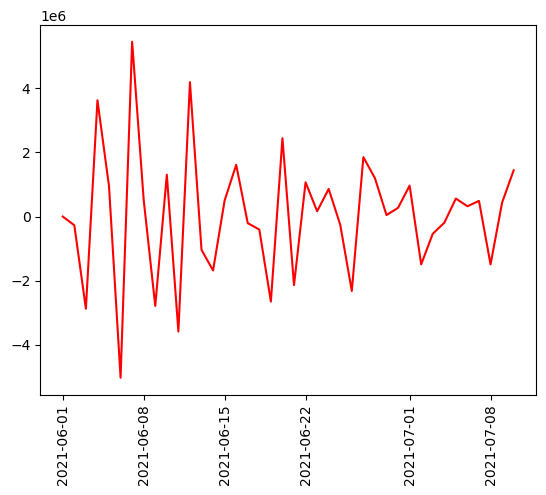

In [41]:
plt.plot(vacc_g["date"],vacc_g["vacc"],color="red")
plt.xticks(rotation=90)
plt.show()


In [42]:
#Which countries vaccinated the largest percentage of their population
df.groupby("location")["total_vaccinations"].sum().sort_values(ascending=False).head(1)

location
Brazil    48209175
Name: total_vaccinations, dtype: int64

In [ ]:
"""❓ 4. What is the link between vaccines and case numbers?
Sub-questions:

Did cases or deaths decrease after vaccinations started?

Do countries with high vaccination rates have fewer deaths?

Is there a visible change in trends before and after vaccination"""

In [ ]:
#Did cases or deaths decrease after vaccinations started

In [50]:
new_t=df.groupby("total_cases")["new_cases"].sum().reset_index()
new_t


,total_cases,new_cases
0,6476,-248454.0
1,25603,-804881.0
2,28652,-612082.0
3,31928,-331788.0
4,32790,-283230.0
...,...,...
195,978798,722668.0
196,983741,844845.0
197,985686,775952.0
198,986954,938578.0


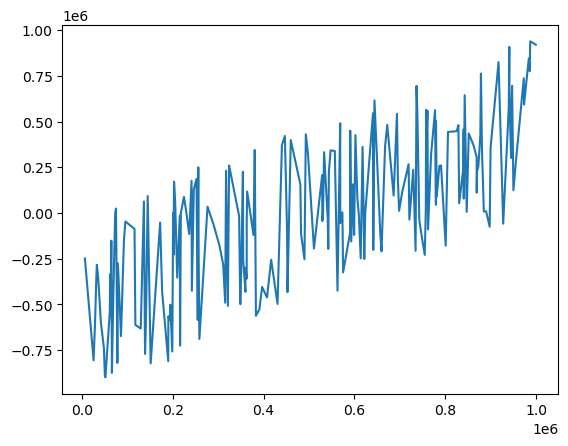

In [51]:
plt.plot(new_t["total_cases"],new_t["new_cases"])
plt.show()


In [53]:
#Is there a visible change in trends before and after vaccination
tren=df.groupby("new_cases")["total_vaccinations"].sum().reset_index()
tren


,new_cases,total_vaccinations
0,-898135.0,1706690
1,-894816.0,335376
2,-873789.0,1460406
3,-822069.0,1444078
4,-819665.0,982616
...,...,...
190,824720.0,214625
191,844845.0,1778273
192,908093.0,1480758
193,920009.0,690117


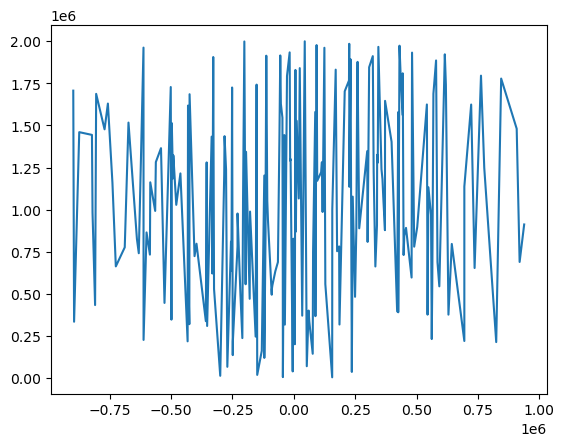

In [54]:
plt.plot(tren["new_cases"],tren["total_vaccinations"])
plt.show()

In [ ]:
"""❓ 5. How deadly was COVID-19 in different countries?
Sub-questions:

What is the fatality rate (deaths ÷ cases) in each country?

Which countries had the highest and lowest fatality rates?

Did the fatality rate improve over time?
"""

In [55]:
#What is the fatality rate (deaths ÷ cases) in each country
df["fatality"]=df["total_deaths"]%df["total_cases"]

In [56]:
df.head()

,location,date,total_cases,total_deaths,total_vaccinations,new_cases,death_per_day,vacc,fatality
0,India,2021-06-01,217724,34626,1214347,NaN,NaN,NaN,34626
1,India,2021-06-02,556690,42417,907907,338966.0,7791.0,-306440.0,42417
2,India,2021-06-03,451631,34383,937621,-105059.0,-8034.0,29714.0,34383
3,India,2021-06-04,877059,31332,1579186,425428.0,-3051.0,641565.0,31332
4,India,2021-06-05,884827,45949,869094,7768.0,14617.0,-710092.0,45949


In [57]:
df.groupby("location")["fatality"].sum().reset_index()

,location,fatality
0,Brazil,926214
1,Germany,1027445
2,India,942466
3,Russia,906292
4,United States,919601


In [59]:
#Which countries had the highest and lowest fatality rates
df.groupby("location")["fatality"].agg(["sum","min","max"])

,sum,min,max
location,,,
Brazil,926214,1500,49621
Germany,1027445,1629,47146
India,942466,655,47404
Russia,906292,1188,45370
United States,919601,173,46648


In [64]:
#Which countries had the highest and lowest fatality rates
min_c=df.groupby("location")["fatality"].sum().idxmin()
max_c=df.groupby("location")["fatality"].sum().idxmax()
print(f"minimum cases in {min_c}")
print(f"maximum cases in {max_c}")

minimum cases in Russia
maximum cases in Germany


In [65]:
df["fatlity_rates"]=df["total_deaths"]/df["total_cases"]*100

In [66]:
df.head()

,location,date,total_cases,total_deaths,total_vaccinations,new_cases,death_per_day,vacc,fatality,fatlity_rates
0,India,2021-06-01,217724,34626,1214347,NaN,NaN,NaN,34626,15.903621
1,India,2021-06-02,556690,42417,907907,338966.0,7791.0,-306440.0,42417,7.619501
2,India,2021-06-03,451631,34383,937621,-105059.0,-8034.0,29714.0,34383,7.613074
3,India,2021-06-04,877059,31332,1579186,425428.0,-3051.0,641565.0,31332,3.572394
4,India,2021-06-05,884827,45949,869094,7768.0,14617.0,-710092.0,45949,5.192993


In [68]:
df.groupby("location")["fatlity_rates"].sum().idxmin()

'United States'

In [69]:
df.groupby("location")["fatlity_rates"].sum().idxmax()

'India'

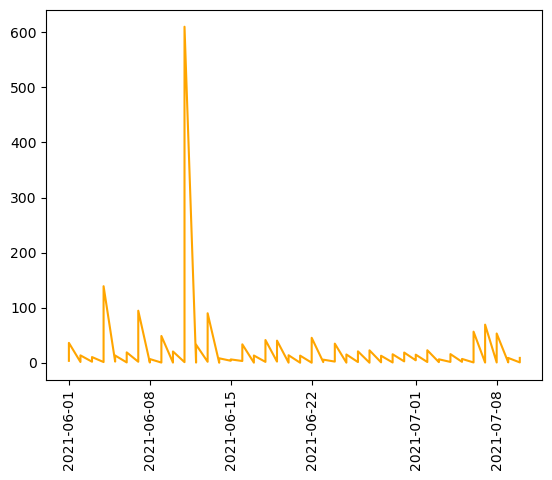

In [70]:
#Did the fatality rate improve over time
dat_e=df.groupby("date")["fatlity_rates"].value_counts().reset_index()
plt.plot(dat_e["date"],dat_e["fatlity_rates"],color="orange")
plt.xticks(rotation=90)
plt.show()
